In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

         ID_CIDERH REGION   FECHA_RBE  TEMP_MEDIA_RBE    LAT_Y    LON_X
0       M_001_B_II     II  1994-06-01             8.6 -22.4953 -69.9044
1       M_001_B_II     II  1994-06-02             9.5 -22.4953 -69.9044
2       M_001_B_II     II  1994-06-03            12.6 -22.4953 -69.9044
3       M_001_B_II     II  1994-06-04            10.7 -22.4953 -69.9044
4       M_001_B_II     II  1994-06-05            10.6 -22.4953 -69.9044
...            ...    ...         ...             ...      ...      ...
146671    M_232_AA     II  1985-04-24            21.0 -22.5000 -68.9170
146672    M_232_AA     II  1986-04-16             3.0 -22.5000 -68.9170
146673    M_232_AA     II  1986-09-20            22.0 -22.5000 -68.9170
146674    M_232_AA     II  1986-11-23            21.0 -22.5000 -68.9170
146675    M_232_AA     II  1987-10-18             8.0 -22.5000 -68.9170

[146676 rows x 6 columns]


In [3]:
df_original = pd.read_csv('MatrizTMII.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MEDIA_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMII.csv', index=False)

archivo_csv2 = "VMTMII.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_B_II  M_002_B_II  M_004_A_II  M_006_A_II  M_009_A_II  M_010_A_II  \
0           8.60        19.4        19.9        13.2        12.2         9.3   
1           9.50        19.5        22.8        13.5         9.9        10.9   
2          12.60        19.9        21.4        13.5        11.0         9.3   
3          10.70        20.0        21.2        13.4        11.1         8.5   
4          10.60        19.9        20.9        12.5        10.4         7.5   
...          ...         ...         ...         ...         ...         ...   
9812       12.40        16.7         NaN         NaN         NaN         NaN   
9813       10.80        17.8         NaN         NaN         NaN         NaN   
9814       14.60        17.7         NaN         NaN         NaN         NaN   
9815       14.25        17.9         NaN         NaN         NaN         NaN   
9816       13.20        17.9         NaN         NaN         NaN         NaN   

      M_011_A_II  M_015_A_II  M_016_A_I

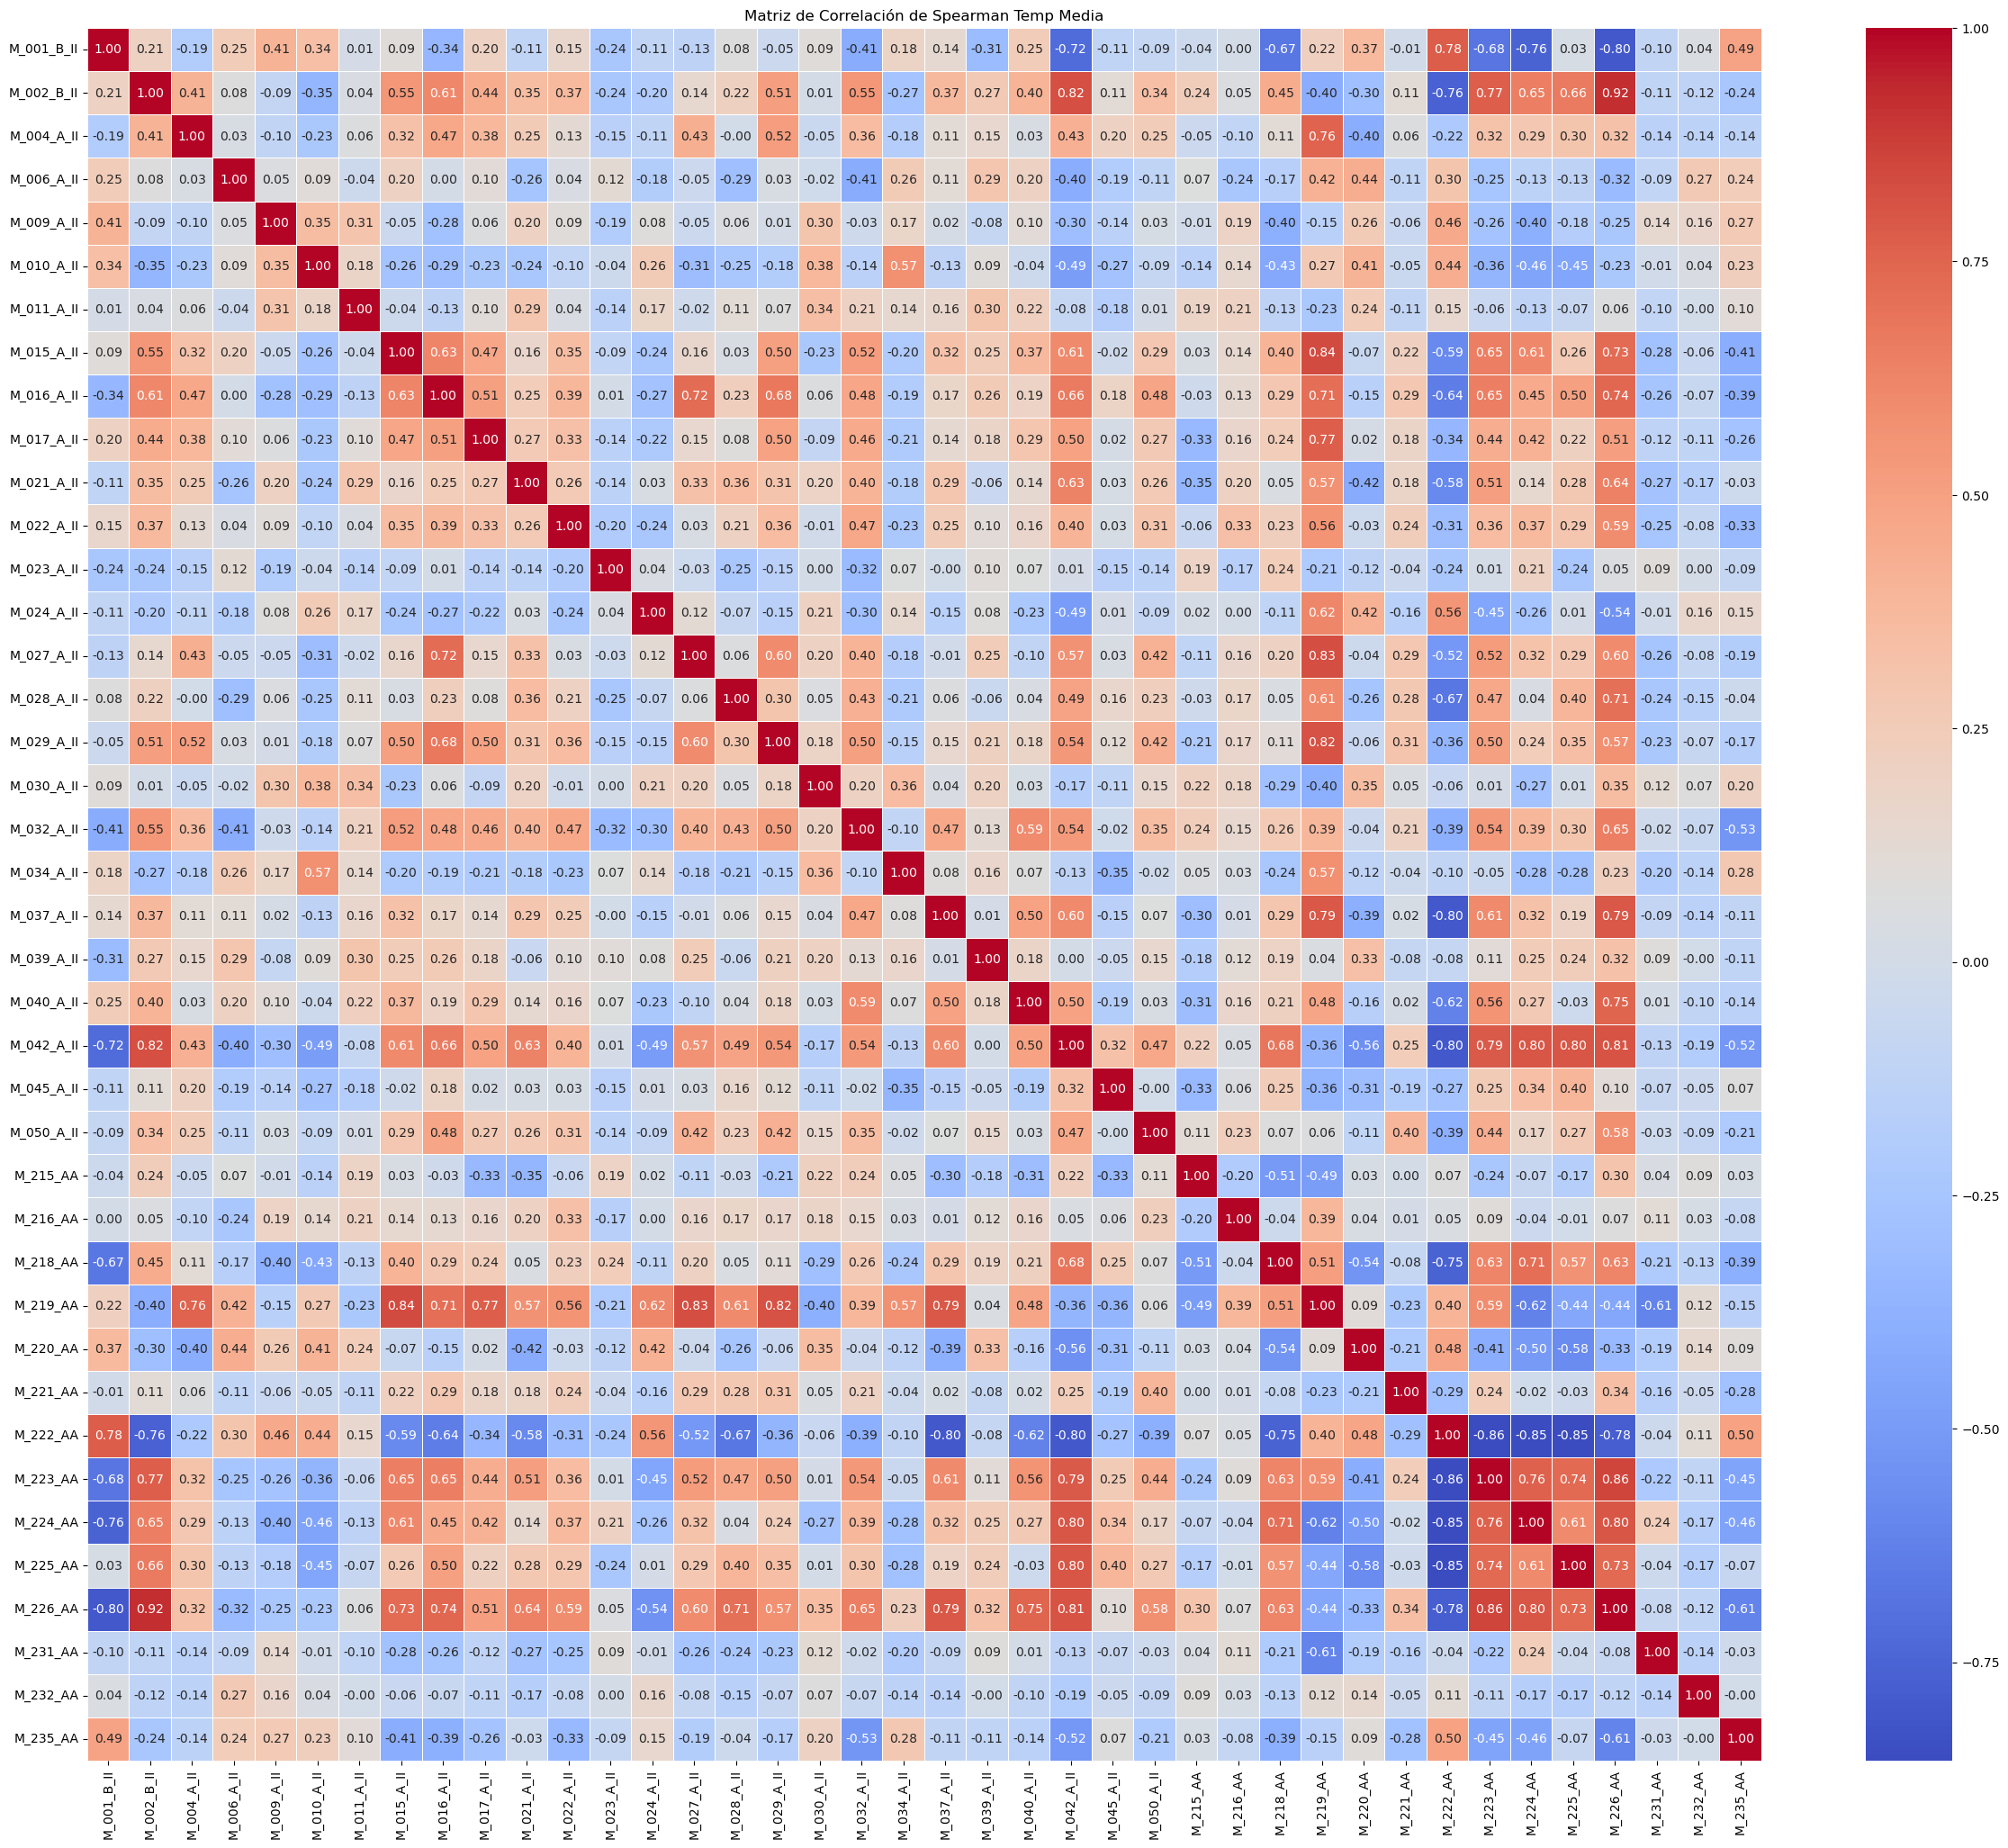

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Media")
plt.show()

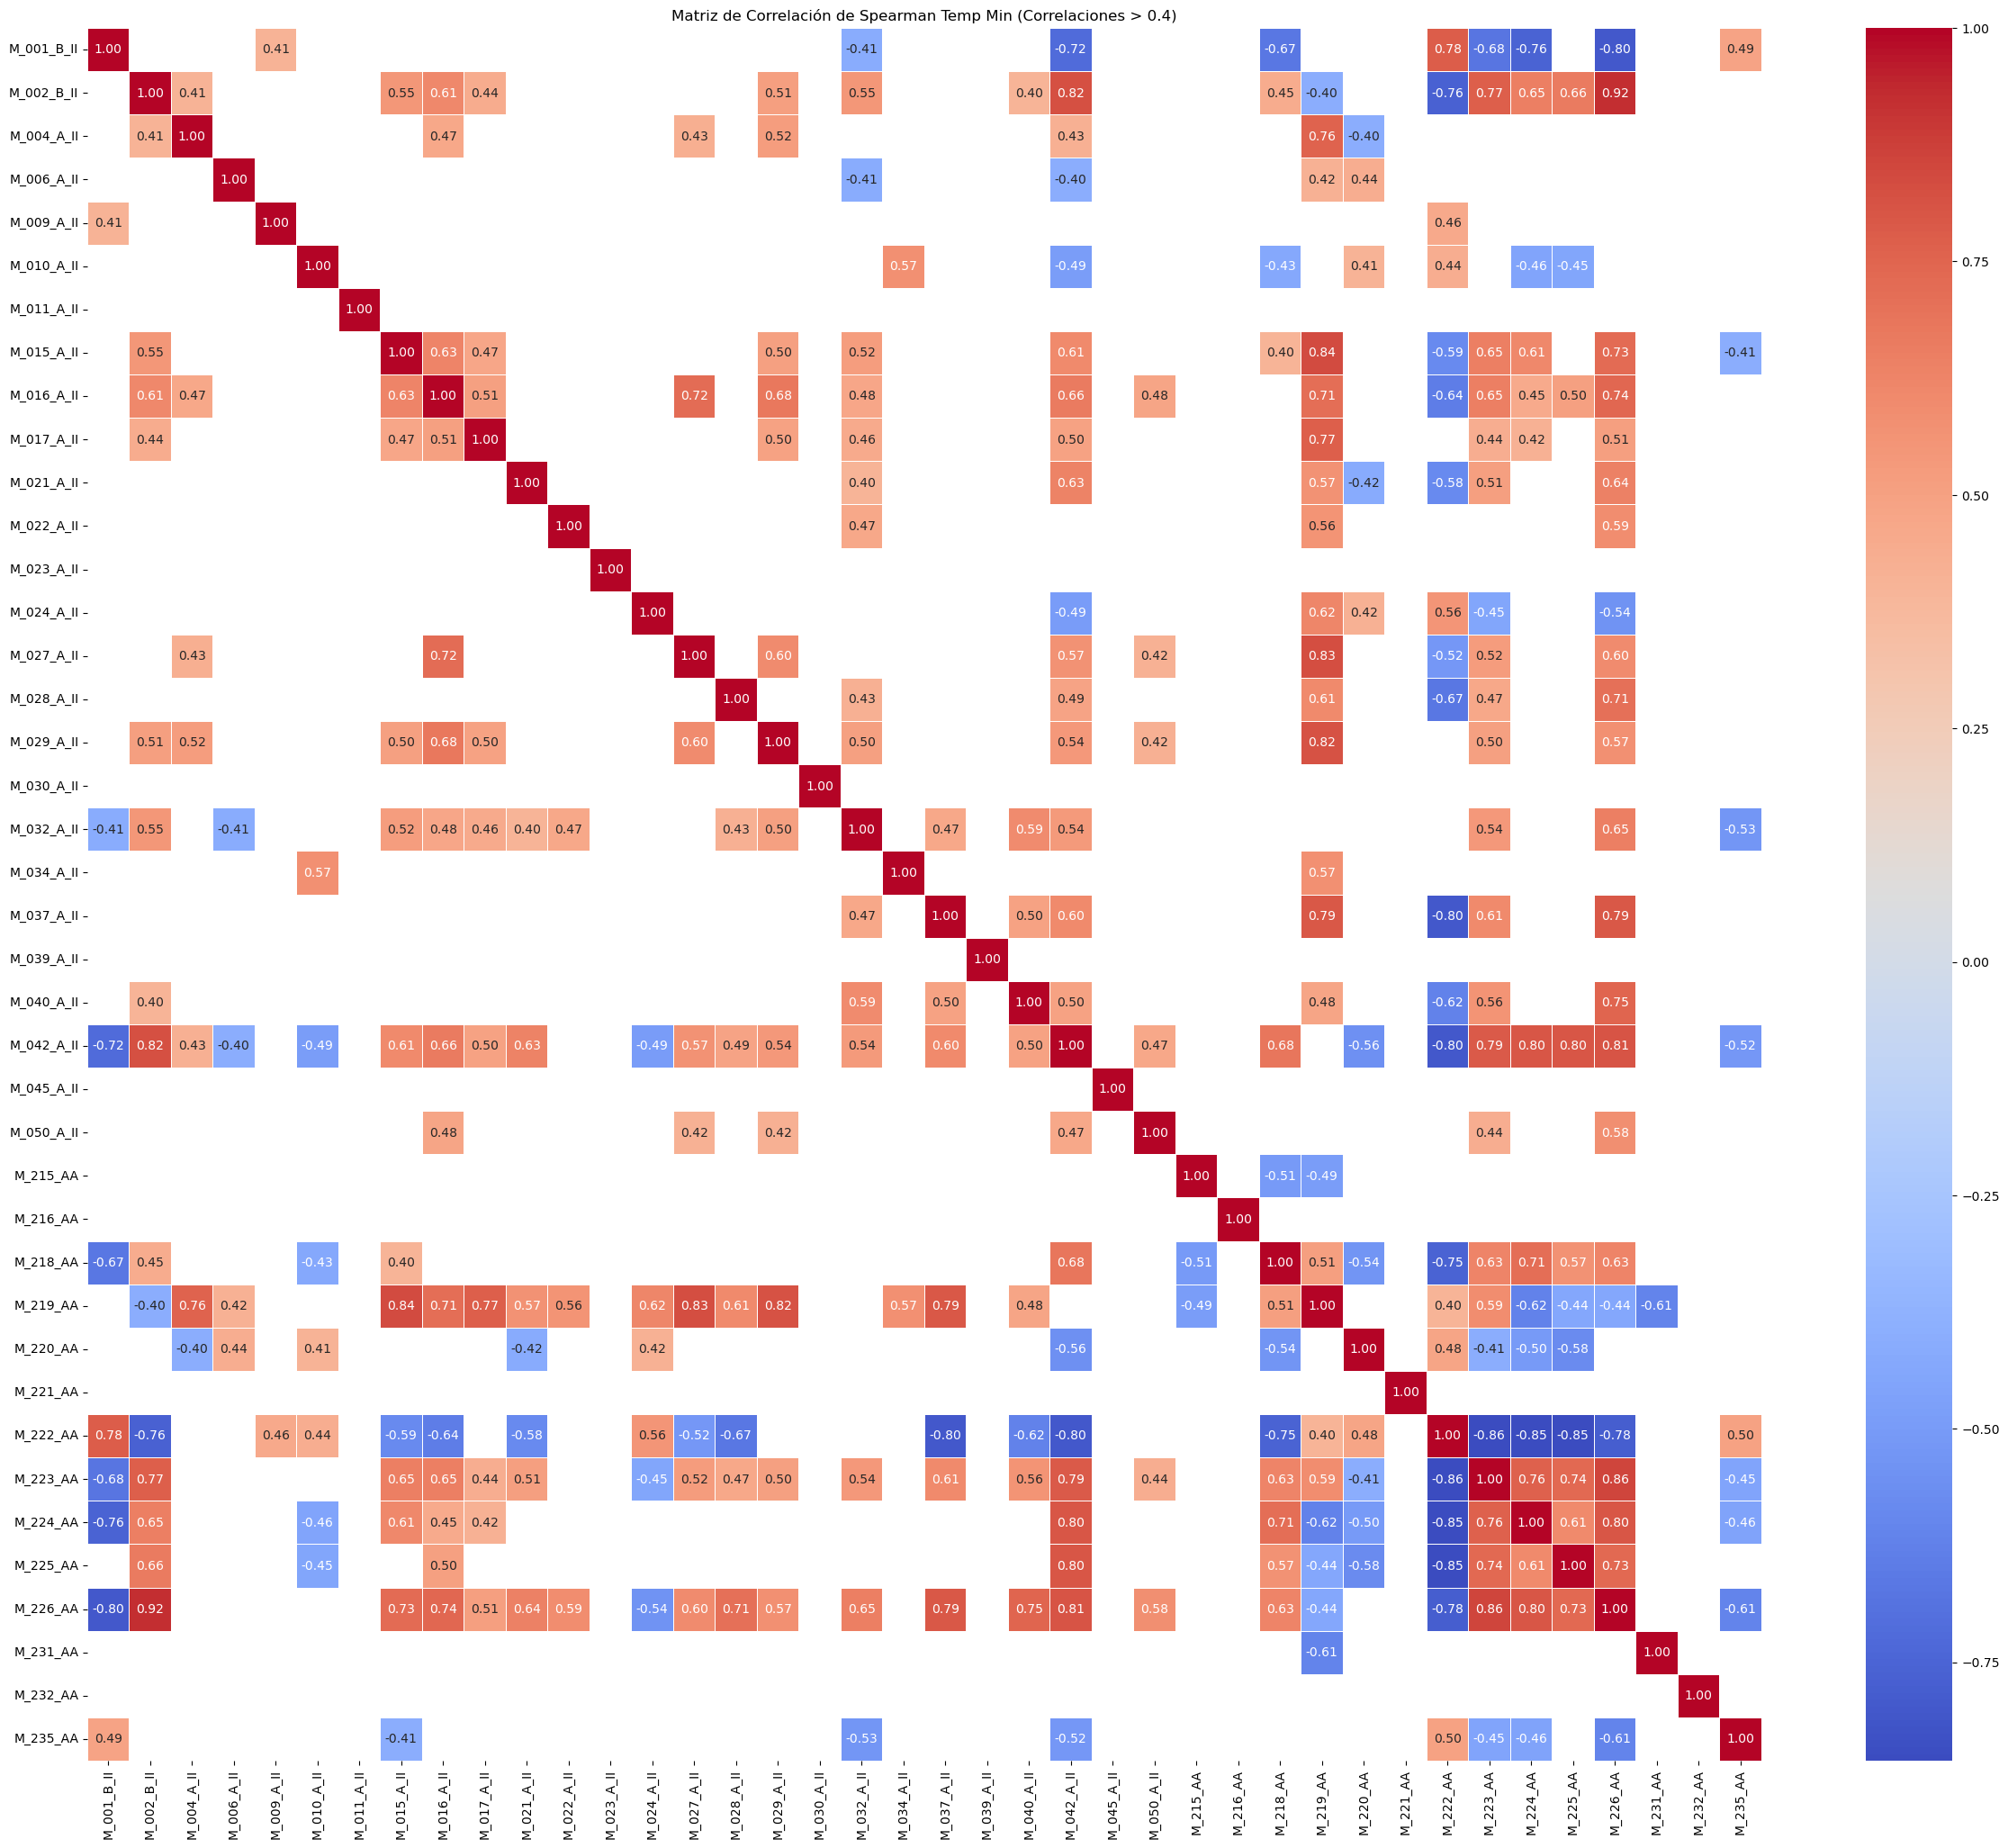

In [5]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Min (Correlaciones > 0.4)")
plt.show()

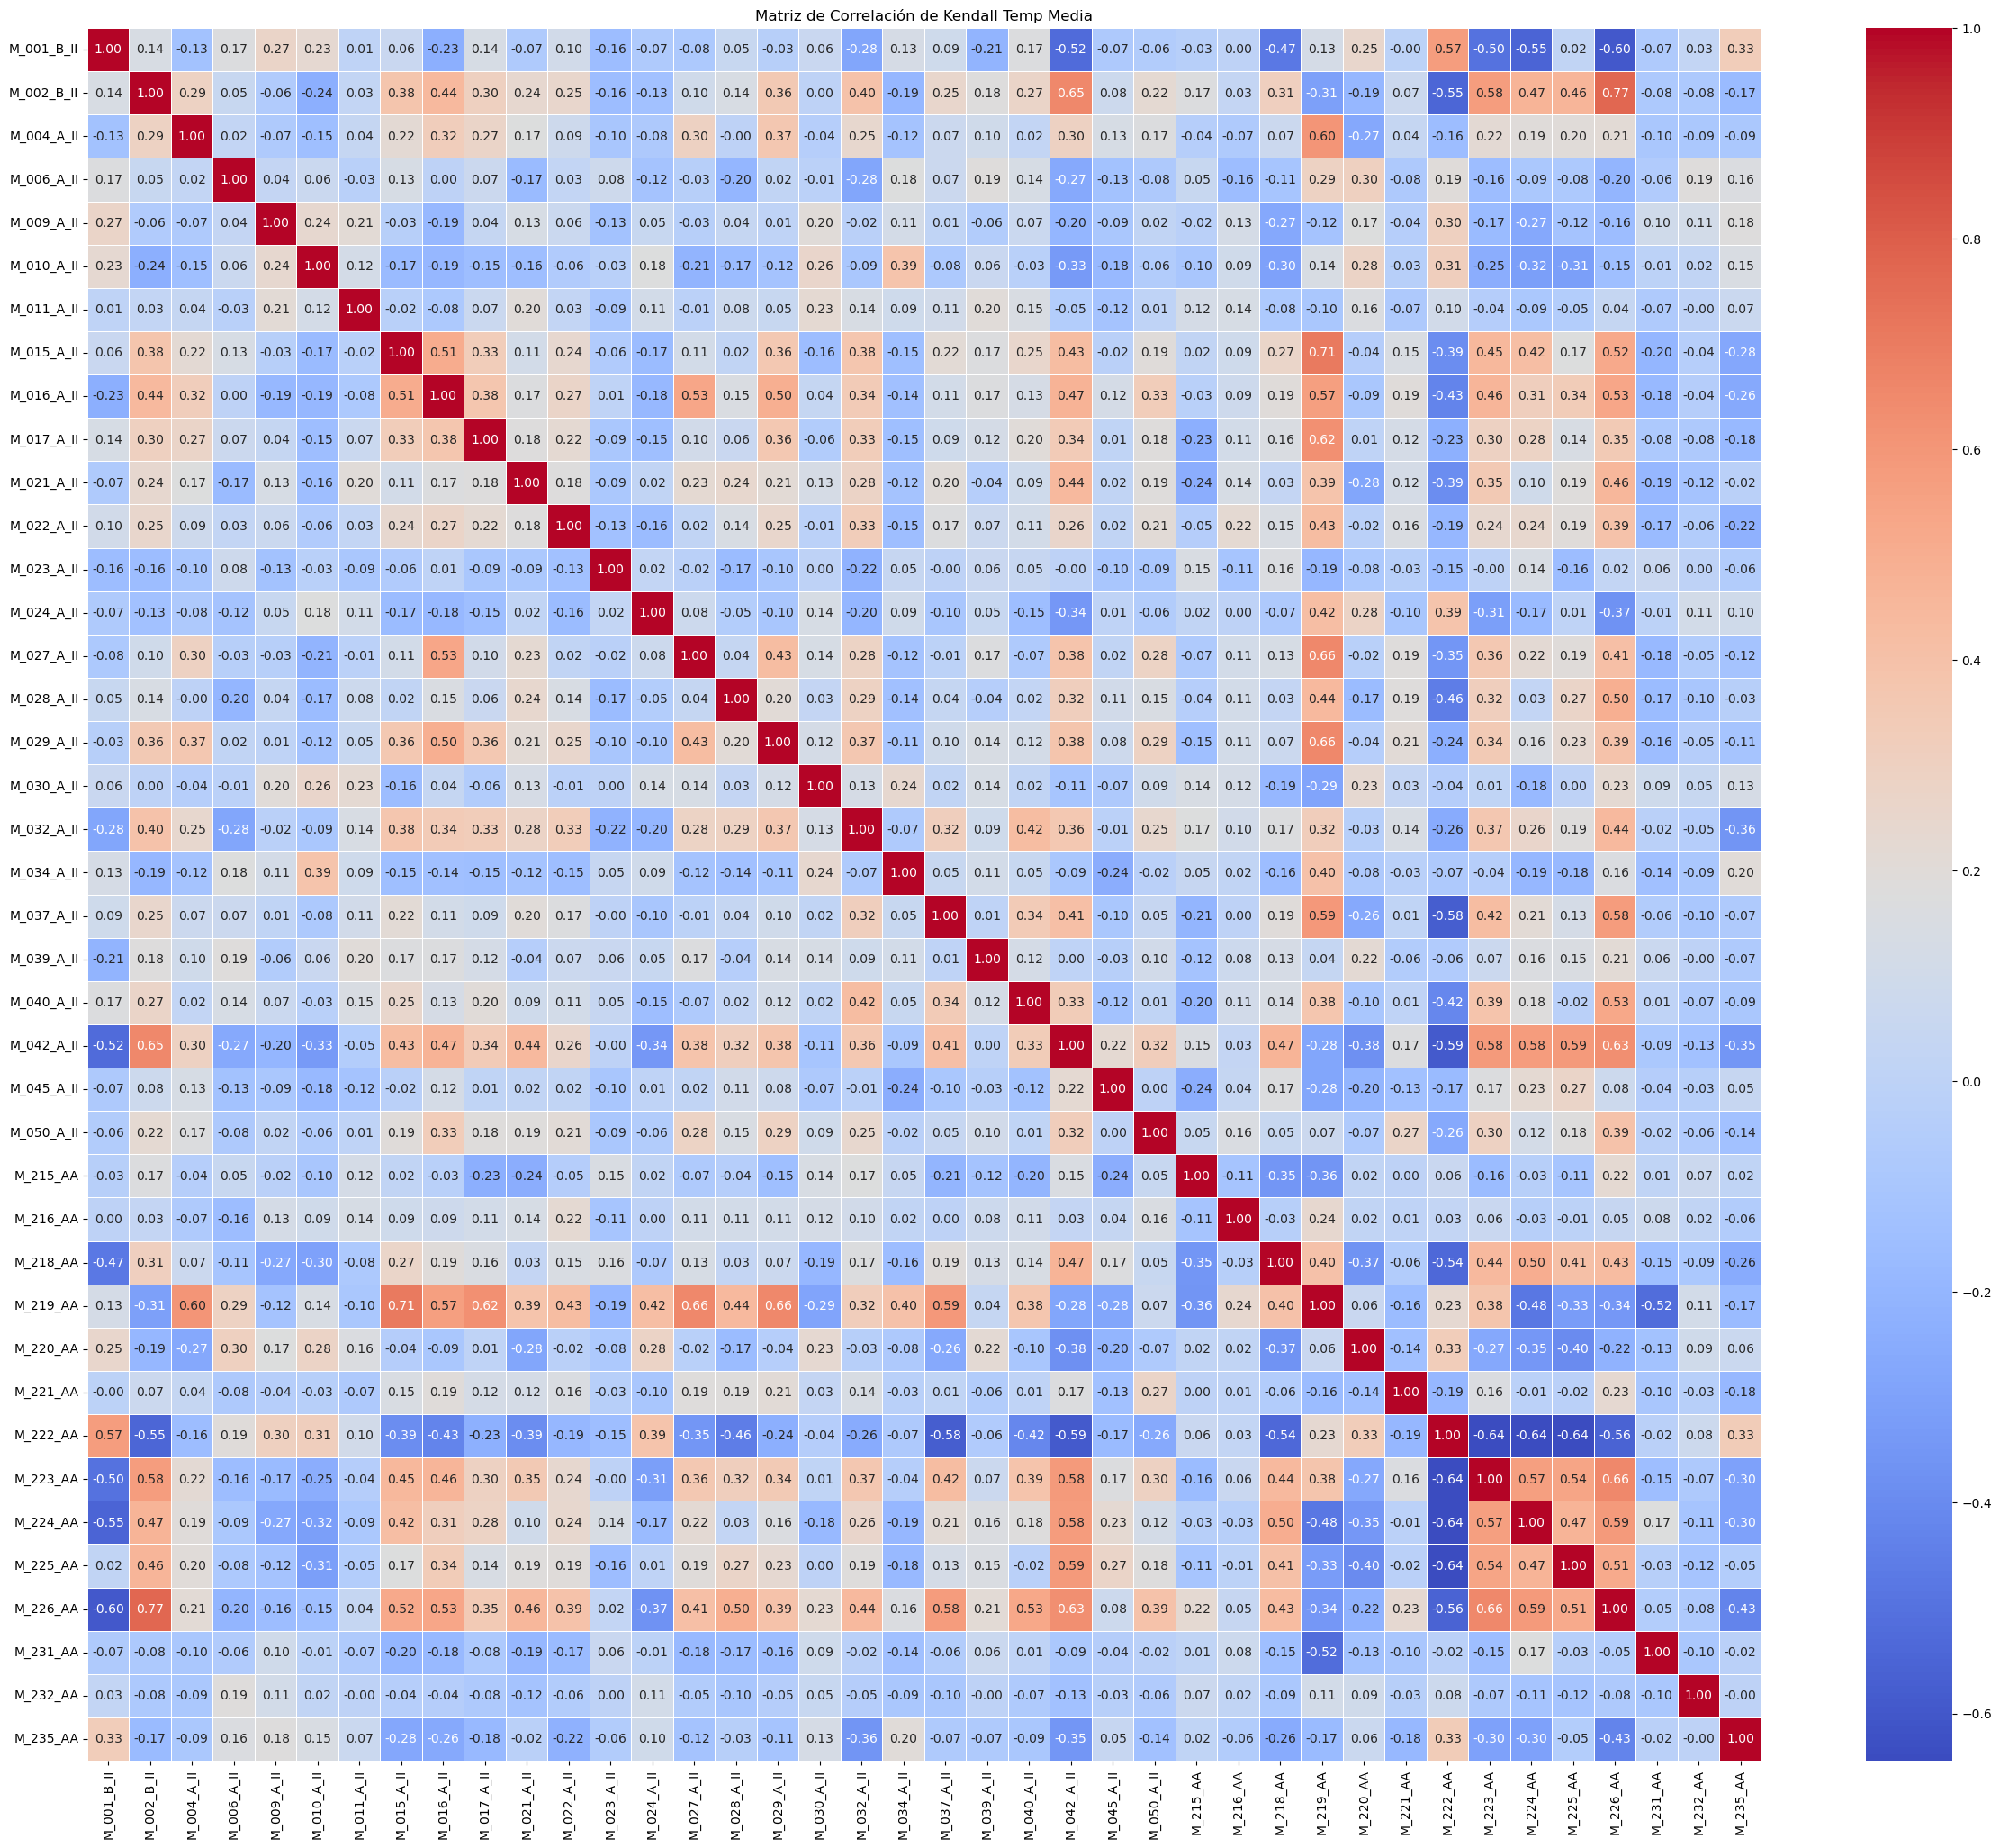

In [5]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall Temp Media")
plt.show()

In [3]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMII.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_II.html')